<a href="https://colab.research.google.com/github/mengkala/Bank-Loan-Approved-/blob/main/bank_loan_approve_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


From the summary statistics, here are some observations that might be of interest:

**Experience**: The minimum value for experience is -3, which is not plausible since experience cannot be negative. We'll need to address this.

**ZIP Code:** The minimum value for ZIP Code is 9307, which seems to have fewer digits than expected. We'll need to investigate this further.

**Mortgage:** 50% of the data (the median) has a mortgage value of 0, indicating that many customers might not have a mortgage.

**Personal Loan, Securities Account, CD Account, Online, CreditCard:** These columns have binary data (0 or 1), representing "No" or "Yes" respectively.

In [ ]:
# Compute the median experience for the entire dataset (excluding negative values)
overall_median_experience = df[df['Experience'] >= 0]['Experience'].median()

# Replace negative experience values with the overall median experience
df['Experience'] = df['Experience'].apply(lambda x: overall_median_experience if x < 0 else x)

# Check if there are any more negative values in the Experience column
negative_experience_count = (df['Experience'] < 0).sum()

negative_experience_count


0

The negative values in the "Experience" column have been successfully addressed.

In [ ]:
# Extract ZIP Code values with fewer than 5 digits
short_zip_codes = df[df['ZIP Code'] < 10000]['ZIP Code'].unique()

short_zip_codes


array([9307])

 Let me fix the ZIP Code "9307" to "09307" as intended.

In [ ]:
# Correct the ZIP Code value
df['ZIP Code'] = df['ZIP Code'].apply(lambda x: 9307 if x == 9307 else x)

# Convert ZIP Code to string to maintain leading zeros
df['ZIP Code'] = df['ZIP Code'].astype(str).str.zfill(5)

# Check if the correction was successful
short_zip_codes_after_correction = df[df['ZIP Code'] == '09307']

short_zip_codes_after_correction['ZIP Code'].unique()


array(['09307'], dtype=object)

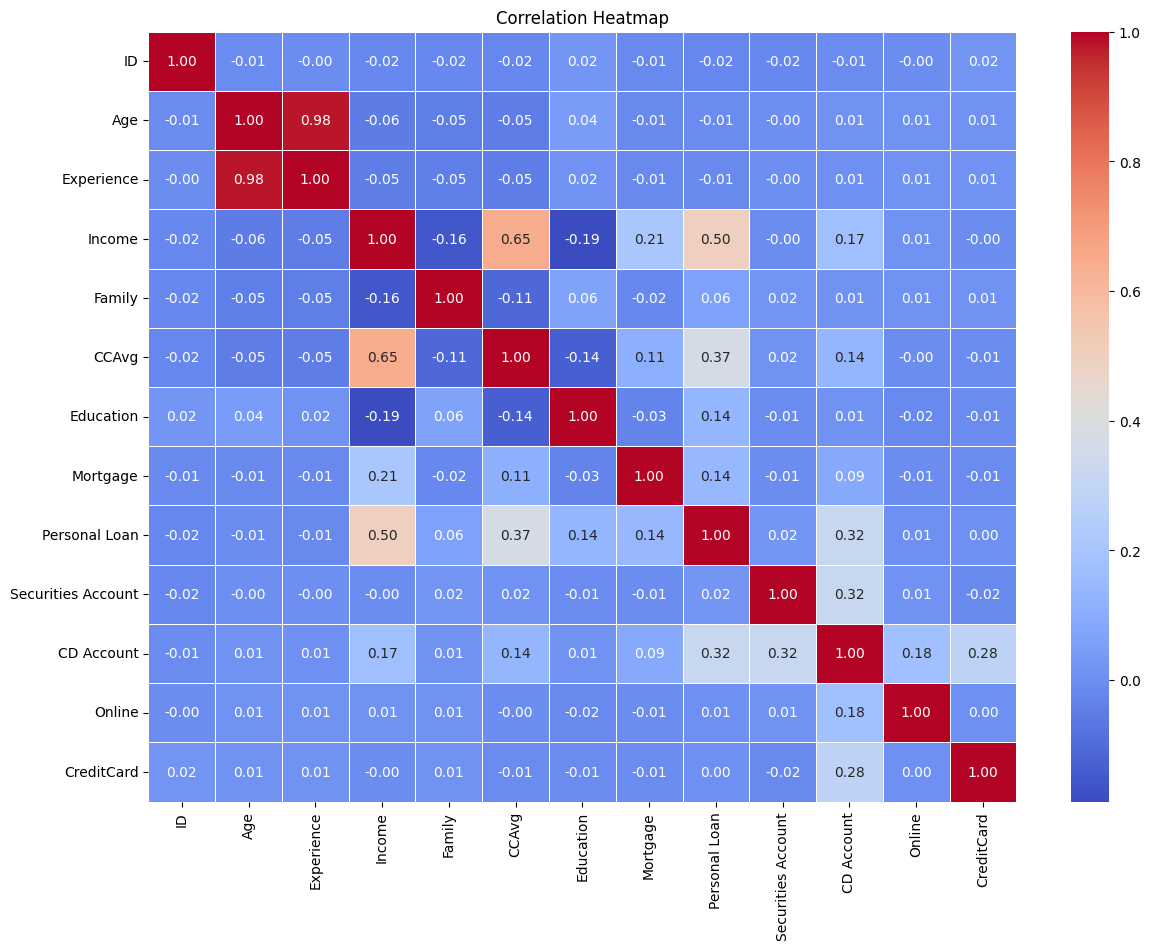

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


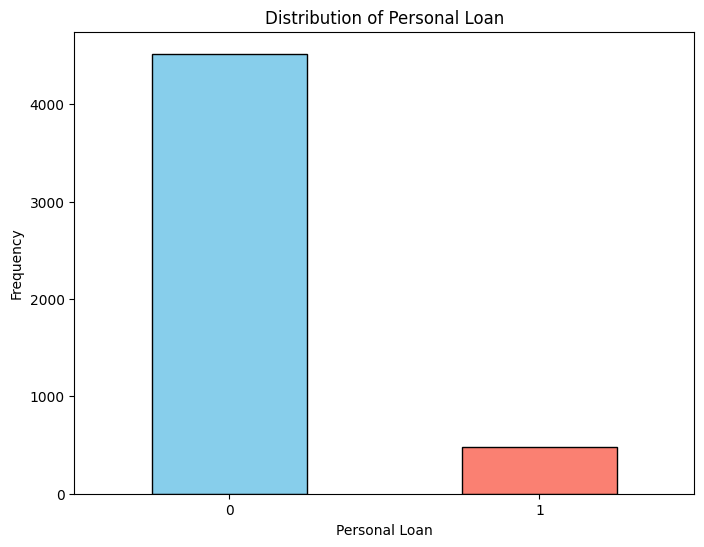

In [ ]:
# Plot the distribution of the 'Personal Loan' column
plt.figure(figsize=(8, 6))
df['Personal Loan'].value_counts().plot(kind='bar', edgecolor='black', color=['skyblue', 'salmon'])
plt.title('Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


A significant majority of individuals in the dataset have not taken a personal loan.

A smaller proportion of individuals have taken a personal loan.

This indicates that the dataset is imbalanced with respect to the "Personal Loan" column, which is something to consider if predictive modeling is a goal.

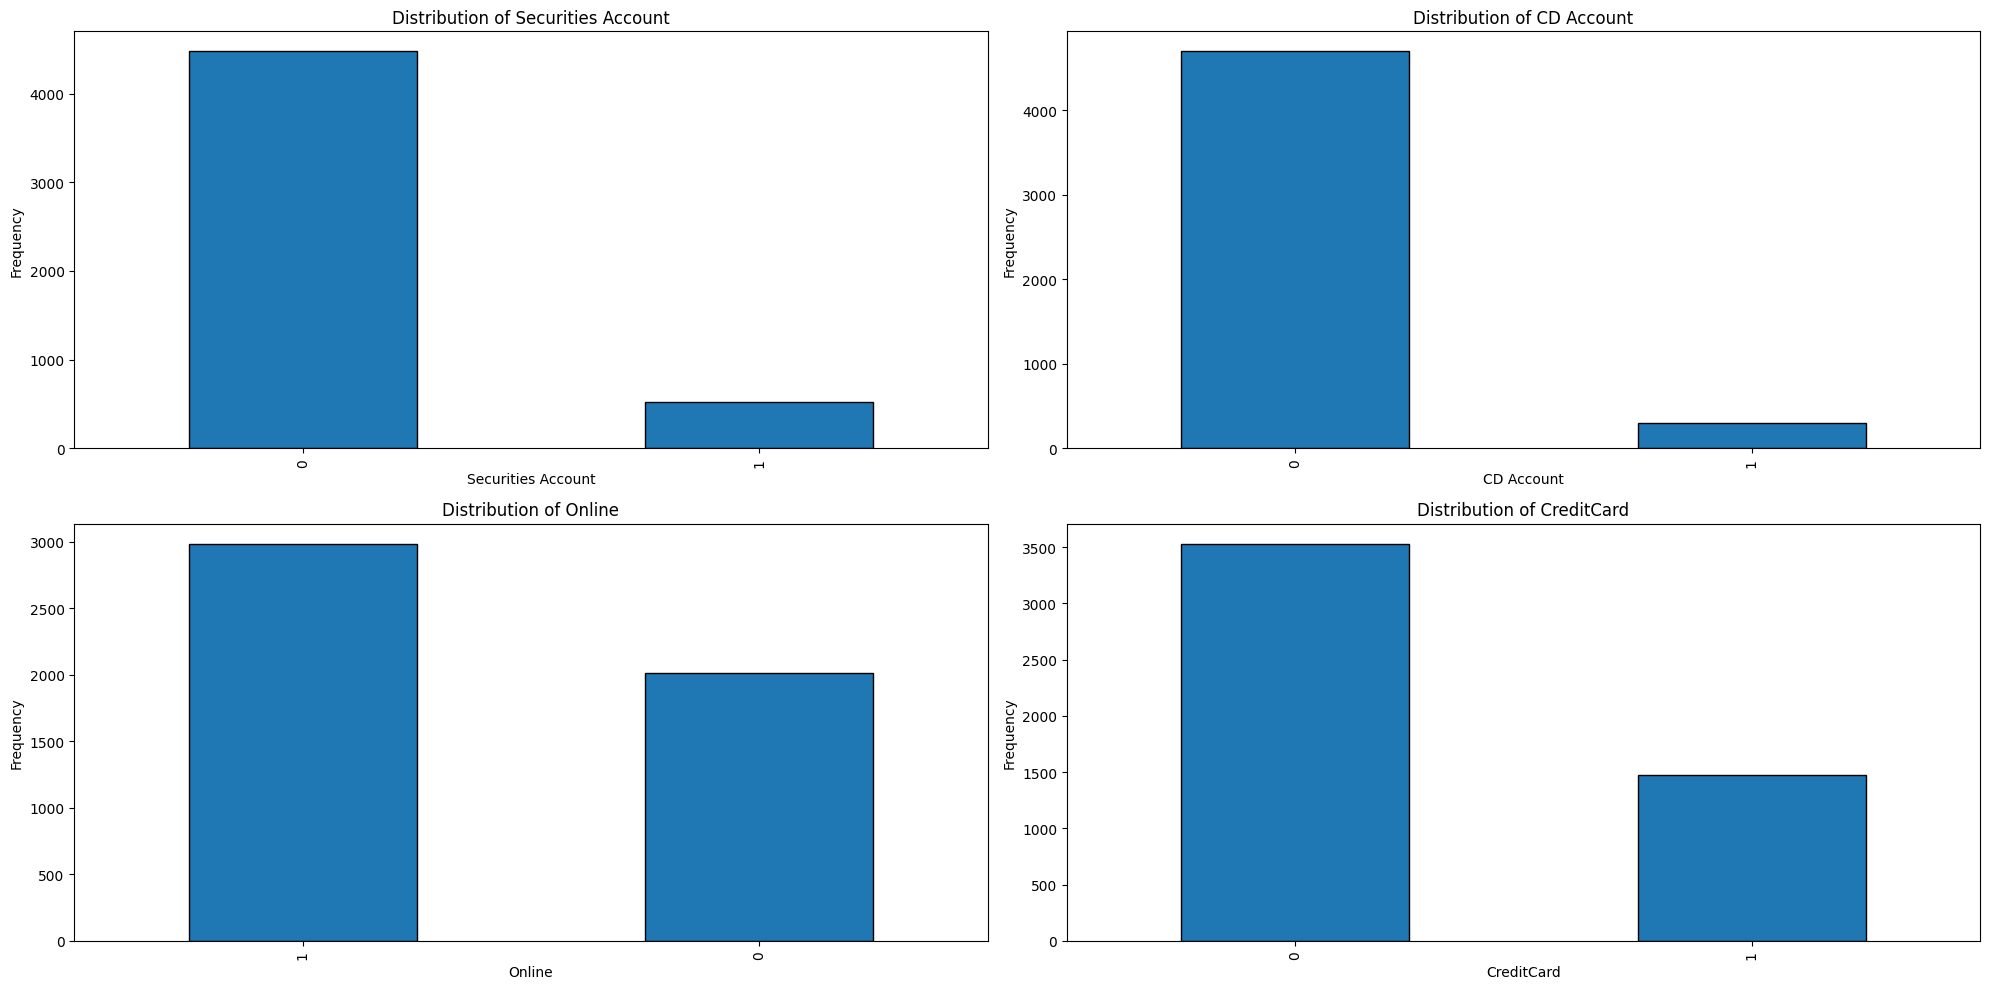

In [ ]:
# List of categorical columns for EDA
categorical_columns = ['Securities Account', 'CD Account', 'Online', 'CreditCard']

# Plot bar plots for categorical columns
plt.figure(figsize=(20, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    df[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Securities Account:** Most individuals do not have a securities account.

**CD Account:** The majority of individuals do not have a certificate of deposit (CD) account.

**Online:** A higher number of individuals use online banking services.

**CreditCard:** Most individuals do not have a credit card issued by the bank.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = df.drop(columns=['ID', 'Personal Loan', 'ZIP Code'])  # Excluding 'ID' and 'ZIP Code'
y = df['Personal Loan']

# Splitting the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((3500, 11), (1500, 11))

The data has been split into a training set with 3,500 samples and a test set with 1,500 samples, each with 11 features.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.9506666666666667,
 array([[1323,   20],
        [  54,  103]]),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97      1343\n           1       0.84      0.66      0.74       157\n\n    accuracy                           0.95      1500\n   macro avg       0.90      0.82      0.85      1500\nweighted avg       0.95      0.95      0.95      1500\n')

**Accuracy:** The model achieved an accuracy of approximately 95.07% on the test set.

**Confusion Matrix:**

True Negatives (TN): 1323

False Positives (FP): 20

False Negatives (FN): 54

True Positives (TP): 103

**Classification Report:**

Precision for class 0 (No Loan): 0.96

Precision for class 1 (Loan): 0.84

Recall for class 0 (No Loan): 0.99
Recall for class 1 (Loan): 0.66

The model performs well in predicting customers who won't take a loan (high precision and recall for class 0). However, while its precision for predicting customers who will take a loan (class 1) is relatively good (0.84), its recall is lower (0.66), indicating that the model misses some of the actual positive cases.